In [41]:
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [42]:
#1) Data Acquisition------------------------

breast_cancer= load_breast_cancer()
# Create DataFrame
dataF = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
target = breast_cancer.target



In [43]:
print(dataF.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [44]:
#2) Data sampling------------------------
X_train, X_test, y_train, y_test = train_test_split(dataF,target, test_size=0.3, random_state=42)


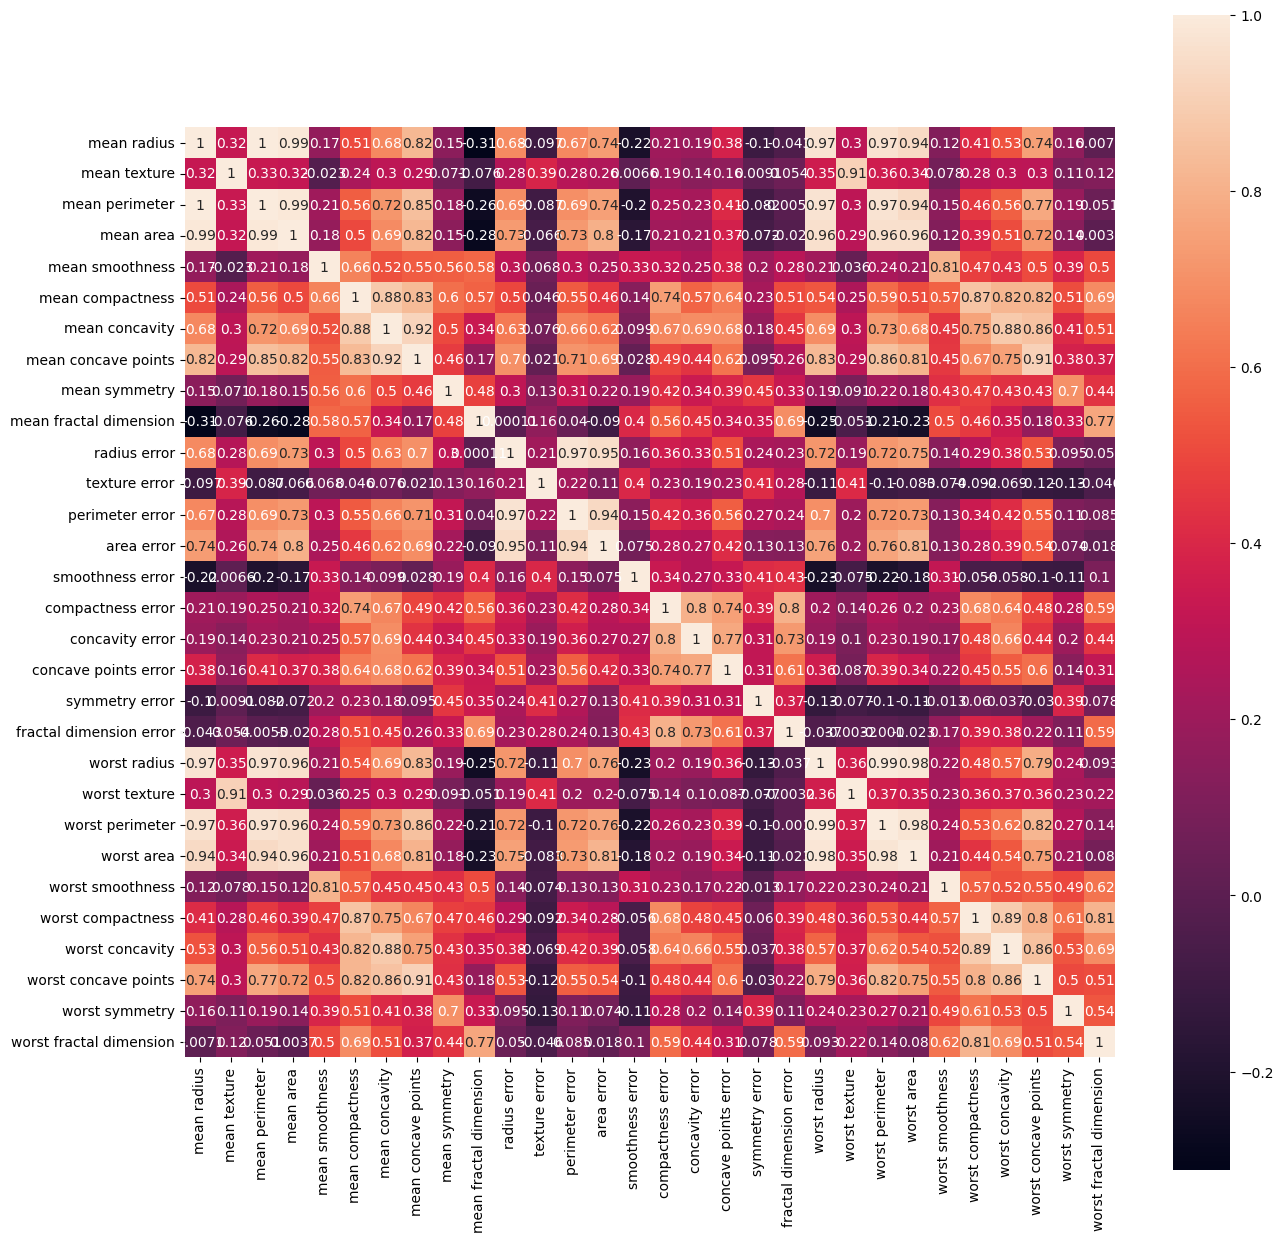

Print just 2 feature



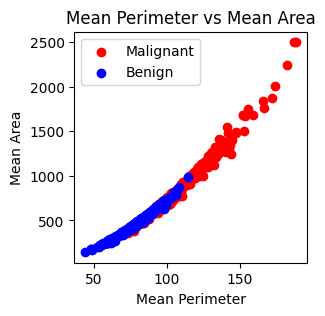

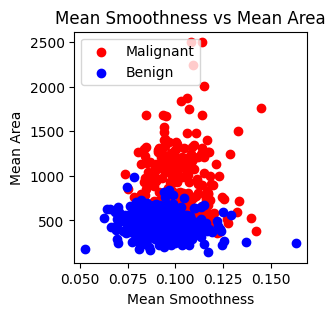

In [45]:
# 3)Exploratory Data Analysis-------------------------------

#heatMap
dataF_corr = dataF.corr()
plt.figure(figsize=(15,15))
sns.heatmap(dataF_corr,square=True,cbar=True, annot=True,annot_kws={'size':10} )
plt.show()


def plotterScatter(x_ax, y_ax, x_label, y_label, title, boolean, target):
    plt.figure(figsize=(3, 3))

    if (boolean):
        plt.scatter(x_ax[target == 0], y_ax[target == 0], c='red', label='Malignant')
        plt.scatter(x_ax[target == 1], y_ax[target == 1], c='blue', label='Benign')
    else:
        plt.scatter(x_ax, y_ax, c='green')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()


dataColumns=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']
printAll=False
if(printAll):
    print("print all 870 plots\n")
    for i in dataColumns:
        for j in dataColumns:
            if(i != j):
                plotterScatter(dataF[i], dataF[j], i, j, f"{i} vs {j}", True, target)
else:
    print("Print just 2 feature\n")
    plotterScatter(dataF['mean perimeter'], dataF['mean area'], 'Mean Perimeter', 'Mean Area', "Mean Perimeter vs Mean Area", True, target)
    plotterScatter(dataF['mean smoothness'], dataF['mean area'], 'Mean Smoothness', 'Mean Area', "Mean Smoothness vs Mean Area", True, target)


In [46]:
#------------------------------------------------------------------------------------------
#4) Data scaling( good for Distance and Gradient Descent based Problems)
StandardScaler_scaler = StandardScaler()
MinMaxScale_scaler = MinMaxScaler()

MinMaxScale_scaled_data = MinMaxScale_scaler.fit_transform(X_train)
StandardScaler_scaled_data= StandardScaler_scaler.fit_transform(X_train)

In [47]:
#------------------------------------------------------------------------------------------
#5) Feature selection and extraction 

In [50]:
#------------------------------------------------------------------------------------------
#6) Initialize model

knn = KNeighborsClassifier(n_neighbors=4)
logReg= LogisticRegression()
DecTree=DecisionTreeClassifier()



In [51]:
#------------------------------------------------------------------------------------------
#7) Train model
#cross valication of 5 folds
Scaled_data=[StandardScaler_scaled_data,MinMaxScale_scaled_data]
Scaler=["StandardScaler","MinMaxScaler"]

best_scaler_f1_macro_knn=[]
best_scaler_f1_macro_logReg=[]
best_scaler_f1_macro_DesTree=[]

print("Cross Validation for the Knn\n")
for i,j in zip(Scaled_data,Scaler):
            cv_f1_macro_knn=cross_val_score(knn,i,y_train,scoring= 'f1_macro',cv=10)
            print(f"this is the f1={cv_f1_macro_knn} for the cross validation for {j} scaler\n")
            best_scaler_f1_macro_knn.append(cv_f1_macro_knn.mean())
            print("----------------------\n")

print("--------------------------------------------------------------")
print("Cross Validation for the Linear Regession\n")
for i,j in zip(Scaled_data,Scaler):
            cv_f1_macro_lnreg=cross_val_score(logReg,i,y_train,scoring= 'f1_macro',cv=10)
            print(f"this is the f1={cv_f1_macro_lnreg} for the cross validation for {j} scaler\n")
            best_scaler_f1_macro_logReg.append(cv_f1_macro_lnreg.mean())
            print("----------------------\n")

print("--------------------------------------------------------------")
print("Cross Validation for the Descision Tree\n")

cv_f1_macro_dec=cross_val_score(DecTree,X_train,y_train,scoring= 'f1_macro',cv=10)
print(f"this is the f1={cv_f1_macro_dec} for the cross validation for Decision Tree\n")

print("best for knn")
for i,j in zip(best_scaler_f1_macro_knn,Scaler):
     print(f"{j} F1_macro ={i}\n")
print("best for logRes")
for i,j in zip(best_scaler_f1_macro_logReg,Scaler):
     print(f"{j} F1_macro ={i}\n")
print(f"best for DecTress is {cv_f1_macro_dec.mean()}")

Cross Validation for the Knn

this is the f1=[0.92263056 0.9729547  0.94666667 0.94666667 0.9729547  1.
 0.94666667 0.9188641  0.94428571 0.91766362] for the cross validation for StandardScaler scaler

----------------------

this is the f1=[0.97366689 0.97366689 0.92100066 0.92100066 0.94666667 1.
 0.97366689 0.9188641  0.97167756 1.        ] for the cross validation for MinMaxScaler scaler

----------------------

--------------------------------------------------------------
Cross Validation for the Linear Regession

this is the f1=[0.97366689 0.9729547  0.9729547  1.         1.         1.
 0.9729547  0.94505495 0.91503268 0.94583333] for the cross validation for StandardScaler scaler

----------------------

this is the f1=[0.94666667 0.9729547  0.94505495 0.9729547  0.94666667 0.9729547
 0.9729547  0.94505495 0.97167756 0.91503268] for the cross validation for MinMaxScaler scaler

----------------------

--------------------------------------------------------------
Cross Validati